# Unit #5 (a) Code

The goal of this notebook is to learn how to implement and interpret one-way and two-way ANOVA and ANCOVA models.

## Problem #1

The goal of the experiment in ["Comparison of Espresso Coffee Brewing Techniques"](https://www.sciencedirect.com/science/article/abs/pii/S0260877413004445) (Parenti et al.) is to "evaluate and compare the differences in terms of quality between espresso coffee made using three different extraction procedures." Quality, in this exercise, is measured in terms of the "foam index". Foam, according to the authors of this study, is a "distinctive feature of espresso coffee, as it is absent in other coffee brews and is required for consumer acceptance."


More compactly, here are the variables in our experimental data set: 

 1. foamIndx: The foam index is defined as the ratio between the foam and liquid volume (vol vol$􏰀^{-1}\%$) measured 30 seconds after extraction

 2. method: Three methods were studied: 
        a. Method 1=Bar Machine(BM); 
        b. Method 2=Hyper-Espresso Method (HIP); and 
        c. Method 3= I-Espresso System (IT).



#### (a) Load the data into R, and recode the ${\tt method}$ variables as a factor with three levels:

1. "1" = "Bar Machine"
2. "2" = "Hyper-Espresso Method"
3. "3" = "I-Espresso System"

In [2]:
library(tidyverse)
library(plyr)
esp = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/espresso1.txt", header = TRUE, sep = "\t")
esp$method <- mapvalues(esp$method, c(1,2,3), c("Bar Machine", "Hyper-Espresso Method", 'I-Espresso System'))

Warning message:
"package 'plyr' was built under R version 3.6.2"------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:purrr':

    compact



#### (b) Print a numerical summary of the data. How many replications are there in each group?

In [4]:
summary(esp)
dim(esp)
head(esp)

    foamIndx        method         
 Min.   :21.02   Length:27         
 1st Qu.:35.66   Class :character  
 Median :38.52   Mode  :character  
 Mean   :44.47                     
 3rd Qu.:55.23                     
 Max.   :73.19                     

[1] 27  2

foamIndx,method
36.64,Bar Machine
39.65,Bar Machine
37.74,Bar Machine
35.96,Bar Machine
38.52,Bar Machine
21.02,Bar Machine


There are 9 replications per group for all 3 groups

#### (c) Produce a boxplot or violin plot of the data (foam index vs method). Visually assess the differences in mean foam index across methods. Summarize your assessment.

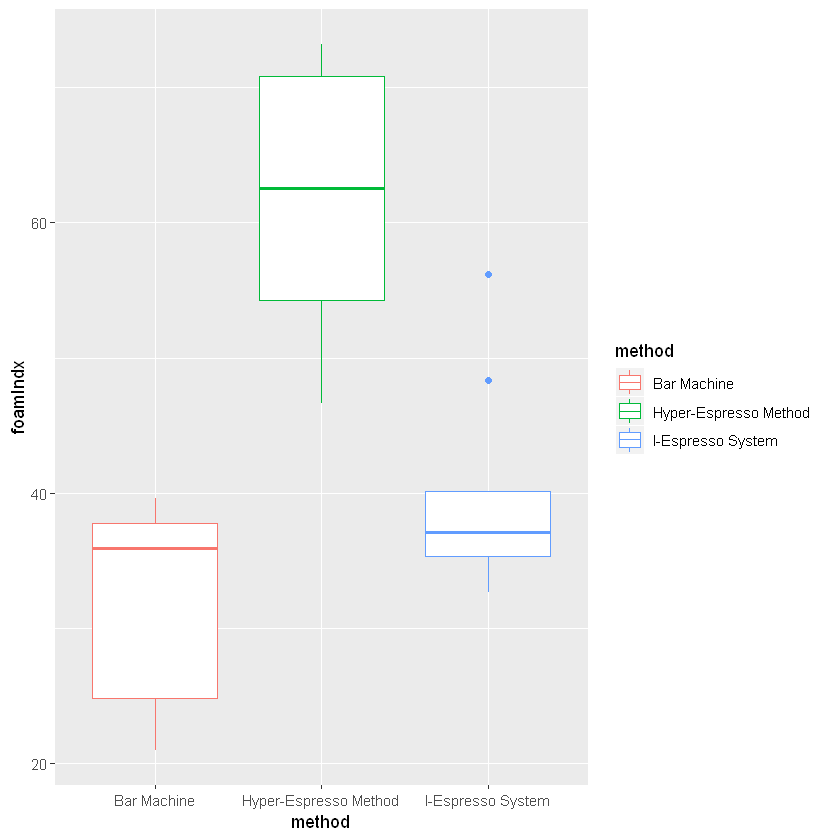

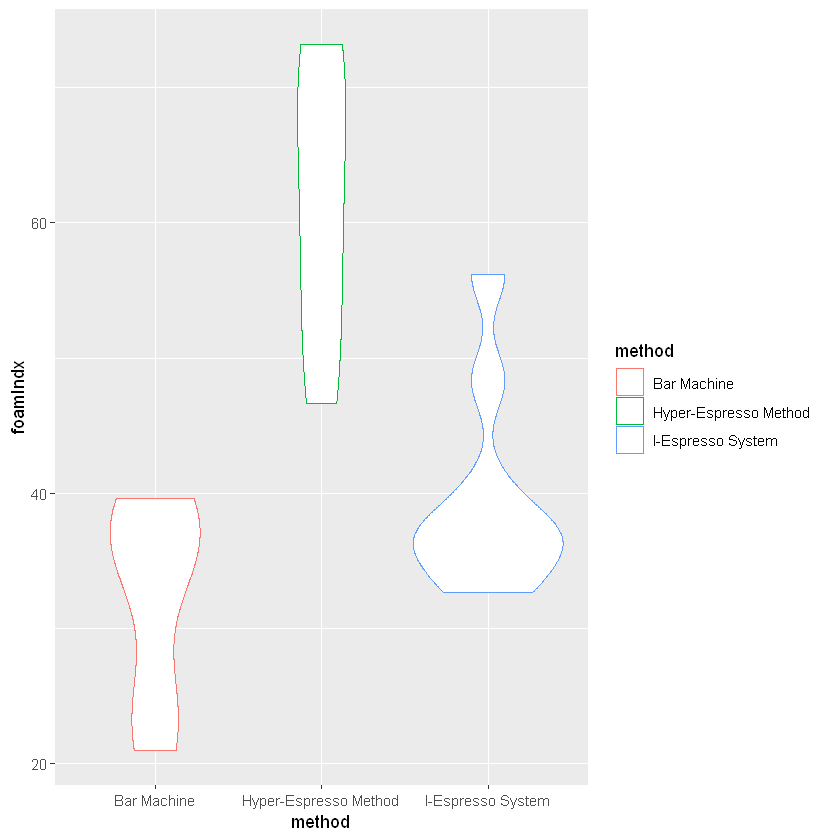

In [5]:
library(ggplot2)
#library(Hmisc)
esp$method = as.factor(esp$method)
ggplot(data = esp, aes(x = method, y = foamIndx, color = method)) + geom_boxplot()
ggplot(data = esp, aes(x = method, y = foamIndx, color = method)) + geom_violin()

The Hyper-Espresso Method clearly seems to have a higher mean than the Bar Machine or the I-Espresso System. There is not clear evidence that the mean of Bar Machine and the I-Espresso System are different, but the interquatile range of the I-Espresso system is significantly smaller than the other two methods so it is likely more constant


#### (d) Conduct a one-way ANOVA on this data. What is the mean foam index of each method?

In [6]:
lmod = lm(data = esp, foamIndx ~ method)
anova(lmod)
summary(lmod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
method,2,4065.180,2032.5900,28.41261,4.698636e-07
Residuals,24,1716.919,71.5383,NA,NA



Call:
lm(formula = foamIndx ~ method, data = esp)

Residuals:
   Min     1Q Median     3Q    Max 
-14.62  -6.60   0.41   5.73  16.49 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   32.400      2.819  11.492 3.04e-11 ***
methodHyper-Espresso Method   28.900      3.987   7.248 1.73e-07 ***
methodI-Espresso System        7.300      3.987   1.831   0.0796 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.458 on 24 degrees of freedom
Multiple R-squared:  0.7031,	Adjusted R-squared:  0.6783 
F-statistic: 28.41 on 2 and 24 DF,  p-value: 4.699e-07


From our summary of the linear model we can see that the mean for treatment 1, the intercept, is equal to 32.4, the mean for method 2 is 32.4 + 28.9 = 61.3 and the mean for method 3 is 32.4 + 7.3 = 39.7. The p-value of the ANOVA test is less than 0.05 so we can be 95% certain that at least two of the methods produce a different foam index on average. If we wanted to test each of the methods against each other we would run a Tukey test to compare all of the possible combinations.

#### (e)  Use statistical evidence to draw a conclusion about whether there are differences in mean foam index across methods.

We can look at the p-value for the F-test on our ANOVA and see that it is below 0.05 which means that we can say with 95% confidence that there is an effect on the mean foam index depending on the method of brewing used.

## Problem #2

### (Notice that I am giving you the code for this problem. We will walk through it in class.)

To demonstrate how interaction terms work in an ANCOVA model, let's generate some data. First, we consider the model 

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3XZ + \varepsilon_i$$

where $X$ is a continuous covariate, $Z$ is a dummy variable coding the levels of a two level factor, and $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$. We choose values for the parameters below (b0,...,b3). 

First, notice that $\beta_3 = 0$. In this case, we can think about having two separate regression lines--one for $Y$ against $X$ when the unit is in group $Z = 0$ and another for $Y$ against $X$ when the unit is in group $Z = 1$. What do we notice about the slope of each of these lines?


x,z,y
0.09159879,1,6.290179
1.96439135,1,10.168612
0.57805656,1,7.200027
0.03370108,0,1.289331
1.82614045,0,4.470862
0.71220319,0,2.485743


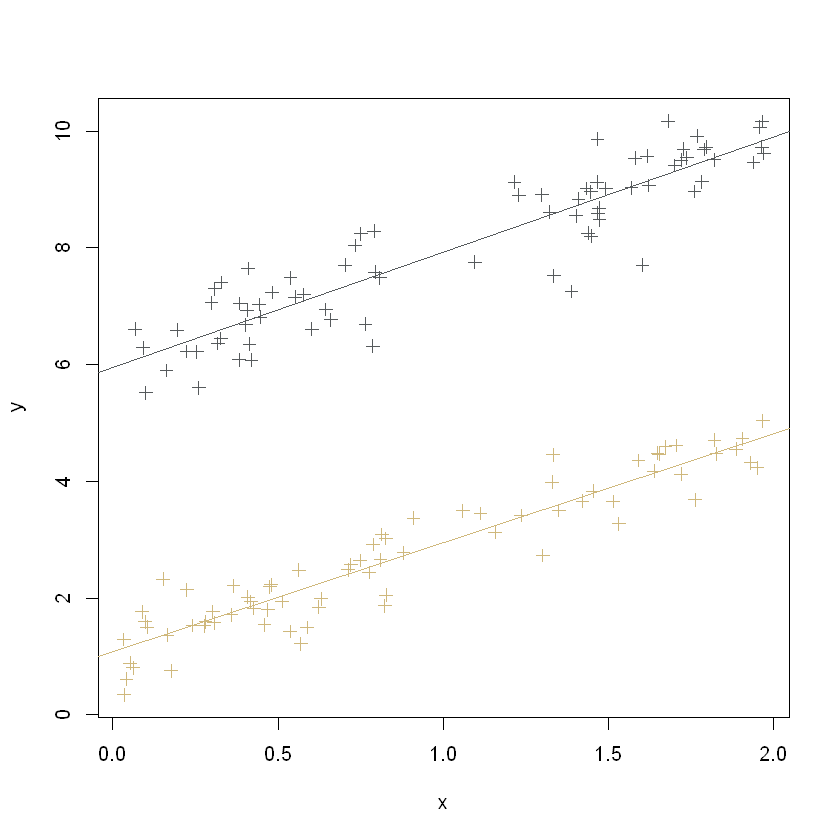

In [8]:
rm(list = ls())
set.seed(99)

#simulate data
n = 150
b0 = 1; b1 = 2; b2 = 5; b3 = 0; eps = rnorm(n, 0, 0.5);
x = runif(n,0,2); z = runif(n,-2,2);
z = ifelse(z > 0,1,0); 
y = b0 + b1*x + b2*z - b3*(x*z) + eps
df = data.frame(x = x,z = as.factor(z),y = y)
head(df)

#plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("#CFB87C","#565A5C")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "#CFB87C")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "#565A5C")

We notice that the slopes are equal. This means that the interaction term is 0, as defined above. This means that our response variable, Y, has a constant response to our covariate, x, regardless of which level our observational unit falls into with respect to our discrete predictor, Z.

#### Now, let's add the interaction term (let $\beta_3 = 3$). What happens to the slopes of each line?

x,z,y
0.09159879,1,6.564975
1.96439135,1,16.061786
0.57805656,1,8.934197
0.03370108,0,1.289331
1.82614045,0,4.470862
0.71220319,0,2.485743



Call:
lm(formula = y ~ x + z, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2228 -0.9044  0.1285  0.8249  2.0822 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.2856     0.1748  -1.634    0.104    
x             3.4573     0.1429  24.195   <2e-16 ***
z1            7.8208     0.1754  44.600   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.062 on 147 degrees of freedom
Multiple R-squared:  0.9526,	Adjusted R-squared:  0.952 
F-statistic:  1478 on 2 and 147 DF,  p-value: < 2.2e-16



Call:
lm(formula = y[z == 0] ~ x[z == 0], data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92808 -0.25958  0.03177  0.29391  0.96003 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07854    0.08448   12.77   <2e-16 ***
x[z == 0]    1.87232    0.08017   23.35   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4164 on 71 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8832 
F-statistic: 545.4 on 1 and 71 DF,  p-value: < 2.2e-16



Call:
lm(formula = y[z == 1] ~ x[z == 1], data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43962 -0.31643  0.09974  0.33339  1.01539 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.95902    0.11969   49.79   <2e-16 ***
x[z == 1]    4.97128    0.09937   50.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5281 on 75 degrees of freedom
Multiple R-squared:  0.9709,	Adjusted R-squared:  0.9705 
F-statistic:  2503 on 1 and 75 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x + z + x * z, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43962 -0.28033  0.04971  0.32841  1.01539 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07854    0.09678   11.14   <2e-16 ***
x            1.87232    0.09185   20.39   <2e-16 ***
z1           4.88048    0.14511   33.63   <2e-16 ***
x:z1         3.09895    0.12843   24.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4771 on 146 degrees of freedom
Multiple R-squared:  0.9905,	Adjusted R-squared:  0.9903 
F-statistic:  5075 on 3 and 146 DF,  p-value: < 2.2e-16


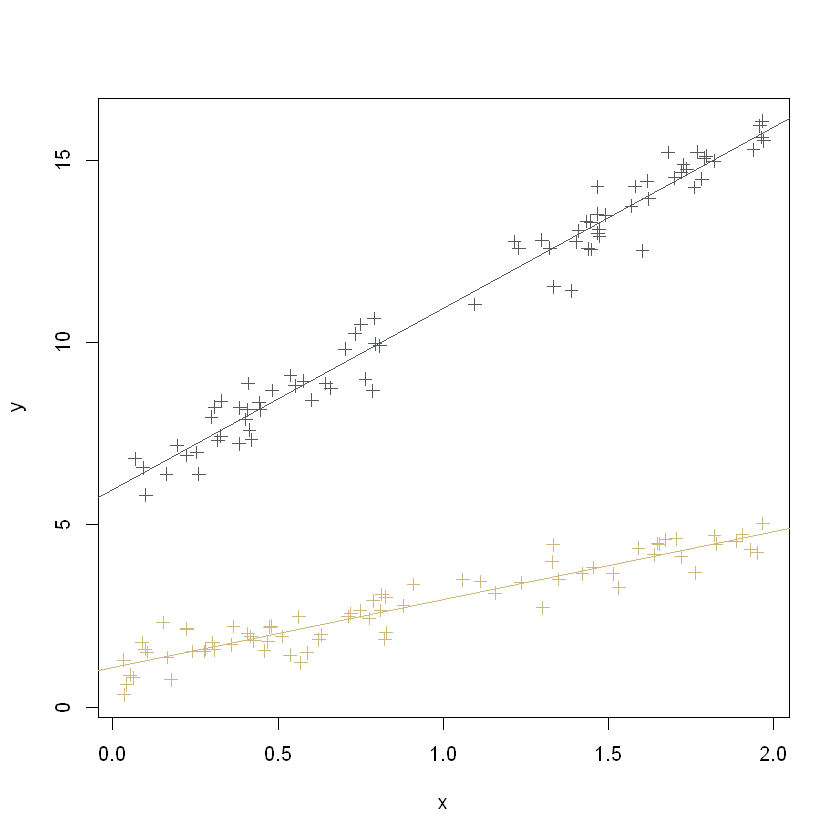

In [10]:
#simulate data
set.seed(99)
n = 150
b0 = 1; b1 = 2; b2 = 5; b3 = 3; eps = rnorm(n, 0, 0.5); 
y = b0 + b1*x + b2*z + b3*(x*z) + eps
df = data.frame(x = x,z = as.factor(z),y = y)
head(df)

lmod = lm(y ~ x + z, data = df)
lmodz0 = lm(y[z == 0] ~ x[z == 0], data = df)
lmodz1 = lm(y[z == 1] ~ x[z == 1], data = df)
summary(lmod)
summary(lmodz0)
summary(lmodz1)

lmodInt = lm(y ~ x + z + x*z, data = df)
summary(lmodInt)

#plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("#CFB87C","#565A5C")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "#CFB87C")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "#565A5C")

We can see that the slopes of the lines are different from each other, which means that the mean response of Y with respect to covariate X, depends on the level of the discrete predictor Z. Thus the interaction term for XZ is not 0.

## Problem #3

Load the mtcars dataset. The goal if this question will be to try to explain the variability in miles per gallon (mpg) using transmission type (am), while adjusting for horsepower (hp).

#### (a) Rename the levels of am from 0 and 1 to "Automatic" and "Manual" (one option for this is to use the revalue() function in the plyr package). Then, create a boxplot (or violin plot) of mpg against am. What do you notice? What is the difference in the mean of mpg for cars in the Automatic group vs the Manual group?

In [26]:
library(tidyverse)
library(plyr)
library(ggplot2)
data(mtcars)

In [27]:
mtcars$am <- mapvalues(mtcars$am, c(1,0), c("Automatic", "Manual"))
head(mtcars)
aggregate(mtcars[,1], list(mtcars$am), mean)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,Automatic,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,Automatic,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,Automatic,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,Manual,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,Manual,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,Manual,3,1


Group.1,x
Automatic,24.39231
Manual,17.14737


Group.1,x
Automatic,24.39231
Manual,17.14737


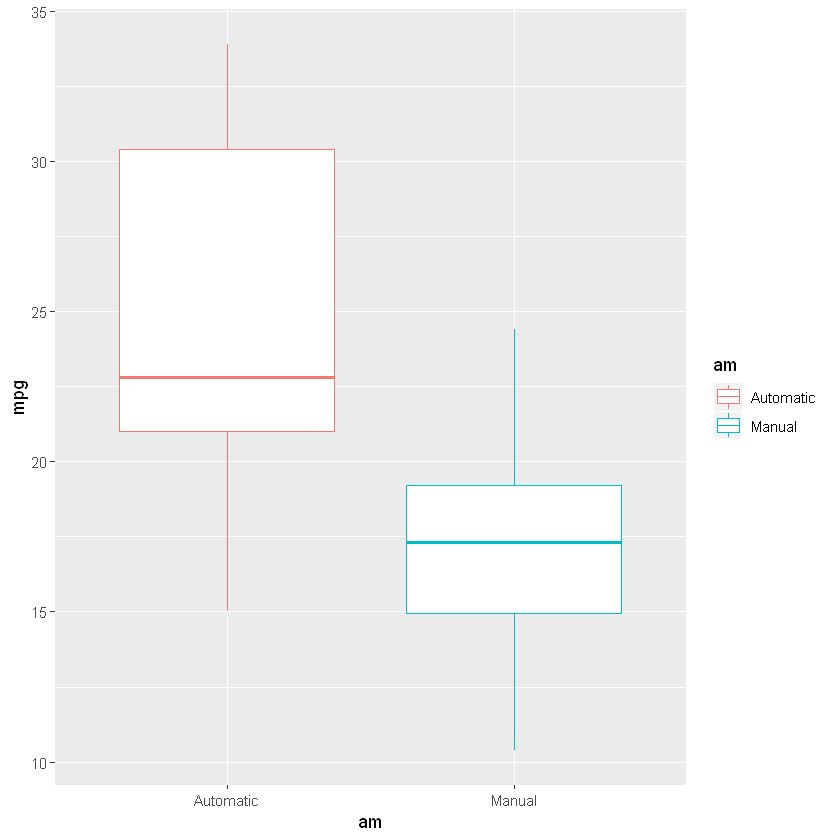

In [28]:
aggregate(mtcars[,1], list(mtcars$am), mean)
ggplot(data = mtcars, aes(x = am, y = mpg, color = am)) + geom_boxplot()

The automatics seem to have a higher average mpg, but the manuals have a smaller interquartile range. The difference in the means is 24.39-17.15 = 7.24 mpg

#### (b) Construct three models: 

1. An ANOVA model that checks for differences in mean mpg across different transmission types. 
2. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower.
3. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower and for interaction effects between horsepower and transmission type.

#### Is the interaction term significant?

In [29]:
model1 = aov(data = mtcars, mpg ~ am)
model2 = aov(data = mtcars, mpg ~ am + hp)
model3 = aov(data = mtcars, mpg ~ am * hp)
summary(model1)
summary(model2)
summary(model3)
anova(model2, model3)

            Df Sum Sq Mean Sq F value   Pr(>F)    
am           1  405.2   405.2   16.86 0.000285 ***
Residuals   30  720.9    24.0                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
am           1  405.2   405.2   47.87 1.33e-07 ***
hp           1  475.5   475.5   56.18 2.92e-08 ***
Residuals   29  245.4     8.5                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            Df Sum Sq Mean Sq F value   Pr(>F)    
am           1  405.2   405.2  46.221 2.20e-07 ***
hp           1  475.5   475.5  54.242 5.09e-08 ***
am:hp        1    0.0     0.0   0.001    0.981    
Residuals   28  245.4     8.8                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
29,245.4393,NA,NA,NA,NA
28,245.4340,1,0.005251456,0.0005991051,0.980646


The interaction term is the only term in any of the models with a p-value greater than 0.05 so it is the only one that is not significant, and the anova between model2 without the interaction parameter, and model3 with it has a p-value greater than 0.05 so we conclude that the reduced model is sufficent, and that the interaction term is likely 0.

#### (c) Construct a plot of mpg against horsepower, and color points based in transmission type. Then, overlay the regression lines with the interaction term, and the lines without. How are these lines consistent with your answer in (b)?

Warning message:
"Computation failed in `stat_smooth()`:
object 'hp' not found"

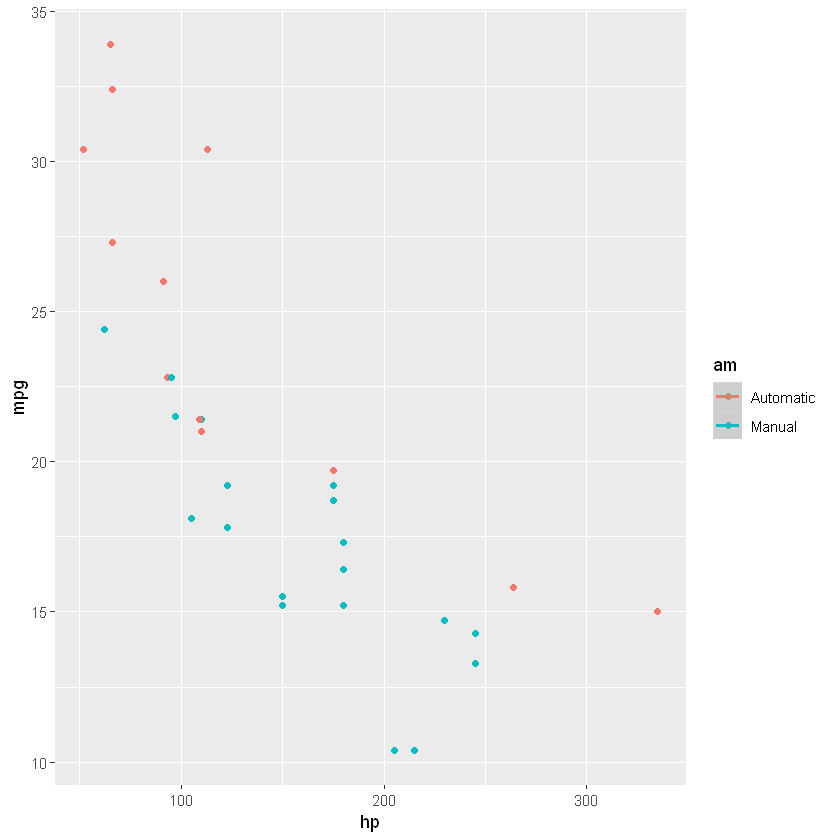

In [44]:
#come back to this in office hours tomorrow. As of now can't get both the data and lines to plot at the same time with either plot or ggplot

p = ggplot(data = mtcars, aes(x = hp, y = mpg, color = am)) + geom_point() 
p + geom_smooth(data = mtcars, method = 'lm', aes(group = am), formula = mpg~hp)

In [ ]:
with(mtcars, plot(hp,mpg, pch = 3, col = c("#CFB87C","#565A5C")[am]))+
abline(coef(lm(mpg[am == 'Manual'] ~ hp[am == 'Manual'], data = mtcars)), col = "#CFB87C")+
abline(coef(lm(mpg[am == 'Automatic'] ~ hp[am == 'Automatic'], data = mtcars)), col = "#565A5C")

## Problem #4

Impact of Launderings on Physsical Properties," International Journal
of Clothing Science and Technology, Vol. 18, 1/2, pp. 43-52.

Description: Effects of Laundering Cycles and denim treatment
on edge abrasion of denim jeans. Data simulated to match means/SDs

Variables/Columns:
1. Laundry Cycles:  1= Control (Zero Launderings), 2=5 Launderings, 3=25  
2. Denim Treatment: 1=Pre-washed, 2=Stone-Washed, 3=Enzyme Washed 
3. Edge abrasion Score: Lower scores mean higher damage  

#### (a) Read in the denim data. Convert the cycle and treatment variables into factors, and recode the factors as follows:

1. cycle: "1" = "Control", "2" = "5 Launderings", "3" = "25 Launderings"
2. treatment: "1" = "Pre-Washed", "2" = "Stone-Washed", "3" = "Enzyme Washed"

In [18]:
denim = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/denim.txt", header = TRUE, sep = "")
denim$cycle = mapvalues(denim$cycle, c(1,2,3), c('Control', '5 Launderings', '25 Launderings'))
denim$treatment = mapvalues(denim$treatment, c(1,2,3), c('Pre-Washed', 'Stone-Washed', 'Enzyme Washed'))
head(denim)

cycle,treatment,score
Control,Pre-Washed,3.2218
Control,Pre-Washed,3.3547
Control,Pre-Washed,3.1334
Control,Pre-Washed,2.6289
Control,Pre-Washed,3.8816
Control,Pre-Washed,3.4383


#### (a) Use the code below to construct interaction plots for cycle and treatment. Comment on these plots.

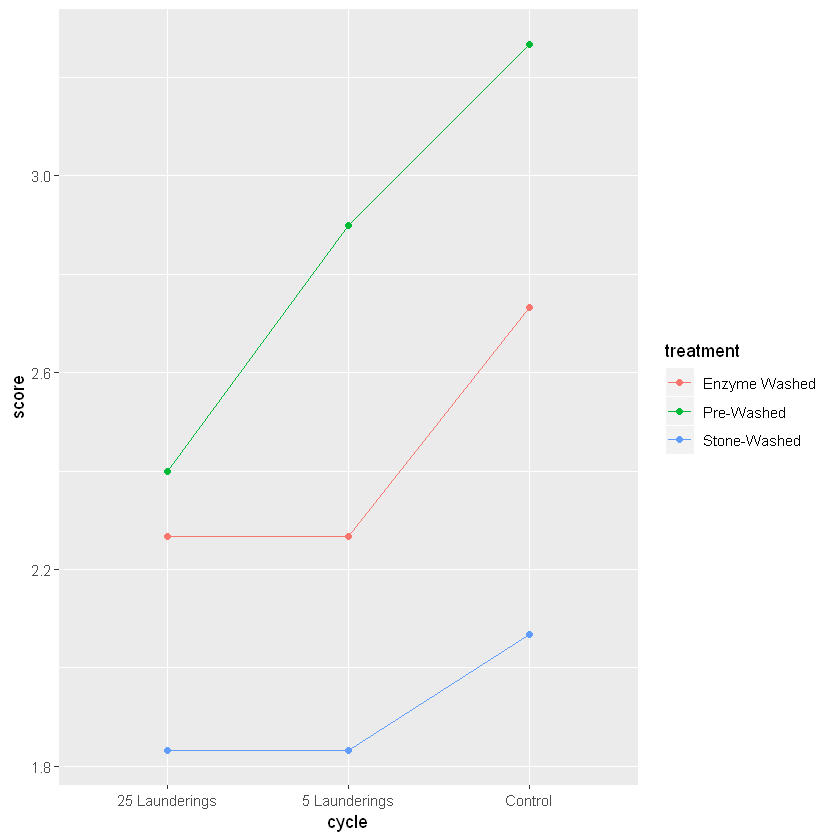

In [19]:
library(tidyverse)
library(plyr)

denim %>% 
  ggplot() +
  aes(x = cycle, color = treatment, group = treatment, y = score) +
  stat_summary(fun.y = mean, geom = "point") +
  stat_summary(fun.y = mean, geom = "line")

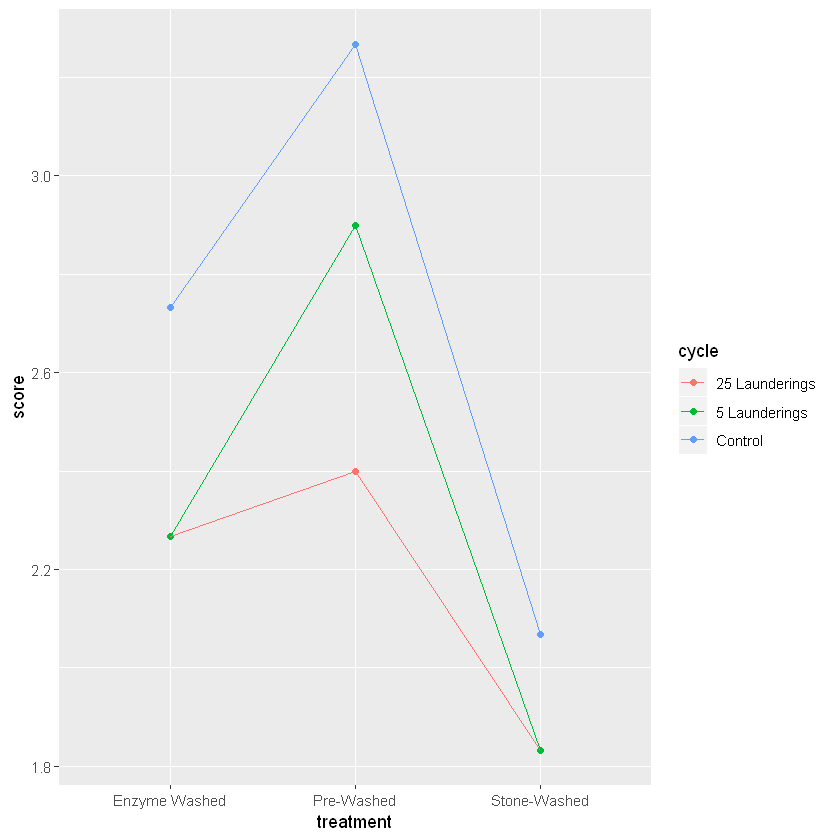

In [21]:
denim %>% 
  ggplot() +
  aes(x = treatment, color = cycle, group = cycle, y = score) +
  stat_summary(fun.y = mean, geom = "point") +
  stat_summary(fun.y = mean, geom = "line")

We can see that the slope of these different lines is the same in all instance, except for difference between 25 and 5 launderings for Pre-Washed jeans. This means there may be a significant interaction term between launderings and wash type

#### (b) Construct a two-way ANOVA model with the factors cycle and treatment. Do not include an interaction term. Assuming that this model is correct, write down the mean edge abrasion score for:

1. Pre-Washed jeans after zero launderings.
2. Stone-Washed jeans after 25 launderings.
3. Enzyme Washed jeans after zero launderings.

In [22]:
lmodNoInt = lm(data = denim, score ~ treatment + cycle)
summary(lmodNoInt)


Call:
lm(formula = score ~ treatment + cycle, data = denim)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.38620 -0.24039  0.03869  0.23688  1.06717 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.19266    0.09985  21.959  < 2e-16 ***
treatmentPre-Washed    0.43334    0.10938   3.962 0.000154 ***
treatmentStone-Washed -0.51133    0.10938  -4.675 1.10e-05 ***
cycle5 Launderings     0.16667    0.10938   1.524 0.131298    
cycleControl           0.52235    0.10938   4.775 7.41e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4236 on 85 degrees of freedom
Multiple R-squared:  0.5369,	Adjusted R-squared:  0.5151 
F-statistic: 24.64 on 4 and 85 DF,  p-value: 1.47e-13


In [23]:
ans1 = 2.19266 + 0.43334 + 0.52235
ans2 = 2.19266 - 0.51133
ans3 = 2.19266 + 0.52235
cat("Mean edge score after: Pre-Wash with 0 launderings:" ,ans1, "Stone-wash with 25 launderings:" ,ans2, "Enzyme-wash after 25 launderings:" ,ans3)

Mean edge score after: Pre-Wash with 0 launderings: 3.14835 Stone-wash with 25 launderings: 1.68133 Enzyme-wash after 25 launderings: 2.71501

#### (c) Now fit the two-way ANOVA model from part (b), but with an interaction term. Conduct a test for whether the interaction is statistically significant. Clearly state the reasoning and conclusion of your test.

In [24]:
lmodInt = lm(data = denim, score ~ treatment + cycle + treatment:cycle)
summary(lmodInt)
anova(lmodNoInt, lmodInt)


Call:
lm(formula = score ~ treatment + cycle + treatment:cycle, data = denim)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16019 -0.24154  0.03694  0.22453  1.15950 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                               2.267e+00  1.311e-01  17.290   <2e-16
treatmentPre-Washed                       1.330e-01  1.854e-01   0.717   0.4753
treatmentStone-Washed                    -4.340e-01  1.854e-01  -2.341   0.0217
cycle5 Launderings                       -9.930e-17  1.854e-01   0.000   1.0000
cycleControl                              4.660e-01  1.854e-01   2.513   0.0140
treatmentPre-Washed:cycle5 Launderings    5.000e-01  2.622e-01   1.907   0.0601
treatmentStone-Washed:cycle5 Launderings -1.000e-05  2.622e-01   0.000   1.0000
treatmentPre-Washed:cycleControl          4.010e-01  2.622e-01   1.529   0.1301
treatmentStone-Washed:cycleControl       -2.320e-01  2.622e-01  -0.885   0.3790
  

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
85,15.25506,NA,NA,NA,NA
81,13.92544,4,1.329628,1.933509,0.1127415


We see that the p-value of our full model vs. the reduced model is 0.113 which is above 0.05 and so we can not say at the 95% confidence level that the interaction term is significant. Thus we will fail to reject our $H_0$: The reduced model is sufficent.